In [1]:
using DelimitedFiles, FileIO
using GLMakie
using JLD2
using NCDatasets

In [3]:
netcdf_path = "SOGN800LL_grd_v2.nc"
dataset = NCDataset(netcdf_path)

Dataset: SOGN800LL_grd_v2.nc
Group: /

Dimensions
   xi_rho = 238
   eta_rho = 121

Variables
  hraw   (238 × 121)
    Datatype:    Float64 (Float64)
    Dimensions:  xi_rho × eta_rho
    Attributes:
     long_name            = Working bathymetry at RHO-points
     units                = meter
     field                = bath, scalar

  h   (238 × 121)
    Datatype:    Float64 (Float64)
    Dimensions:  xi_rho × eta_rho
    Attributes:
     long_name            = Final bathymetry at RHO-points
     units                = meter
     field                = bath, scalar

  lat_rho   (238 × 121)
    Datatype:    Float64 (Float64)
    Dimensions:  xi_rho × eta_rho
    Attributes:
     long_name            = latitude of RHO-points
     units                = degree_north

  lon_rho   (238 × 121)
    Datatype:    Float64 (Float64)
    Dimensions:  xi_rho × eta_rho
    Attributes:
     long_name            = longitude of RHO-points
     units                = degree_east

  angle   (238 × 121)

In [4]:
lat_rho = dataset["lat_rho"][:,:]
lon_rho = dataset["lon_rho"][:,:]

238×121 Matrix{Float64}:
 4.186   4.186   4.186   4.186   4.186   …  4.186   4.186   4.186   4.186
 4.2009  4.2009  4.2009  4.2009  4.2009     4.2009  4.2009  4.2009  4.2009
 4.2158  4.2158  4.2158  4.2158  4.2158     4.2158  4.2158  4.2158  4.2158
 4.2307  4.2307  4.2307  4.2307  4.2307     4.2307  4.2307  4.2307  4.2307
 4.2456  4.2456  4.2456  4.2456  4.2456     4.2456  4.2456  4.2456  4.2456
 4.2605  4.2605  4.2605  4.2605  4.2605  …  4.2605  4.2605  4.2605  4.2605
 4.2754  4.2754  4.2754  4.2754  4.2754     4.2754  4.2754  4.2754  4.2754
 4.2903  4.2903  4.2903  4.2903  4.2903     4.2903  4.2903  4.2903  4.2903
 4.3052  4.3052  4.3052  4.3052  4.3052     4.3052  4.3052  4.3052  4.3052
 4.3201  4.3201  4.3201  4.3201  4.3201     4.3201  4.3201  4.3201  4.3201
 4.335   4.335   4.335   4.335   4.335   …  4.335   4.335   4.335   4.335
 4.3499  4.3499  4.3499  4.3499  4.3499     4.3499  4.3499  4.3499  4.3499
 4.3648  4.3648  4.3648  4.3648  4.3648     4.3648  4.3648  4.3648  4.3648
 ⋮

In [5]:
m = -dataset["h"][:,:]

238×121 Matrix{Float64}:
 -309.65   -310.043  -310.702  -311.064  …  -330.6      -330.097    -329.497
 -310.544  -310.985  -311.675  -311.969     -333.642    -331.375    -329.856
 -311.962  -312.553  -313.348  -313.515     -339.549    -333.971    -330.763
 -312.286  -313.135  -314.051  -314.142     -344.795    -336.57     -332.016
 -311.55   -312.361  -313.173  -313.377     -347.779    -338.135    -332.816
 -310.65   -311.383  -312.059  -312.536  …  -347.809    -338.005    -332.523
 -310.25   -310.635  -311.105  -311.887     -345.367    -336.097    -330.989
 -310.491  -310.647  -310.904  -311.895     -341.739    -333.086    -328.701
 -311.038  -310.961  -311.043  -312.117     -337.036    -329.591    -326.222
 -311.983  -311.935  -311.944  -312.959     -331.532    -326.079    -323.729
 -313.489  -313.53   -313.808  -314.984  …  -327.284    -323.449    -321.59
 -315.536  -315.695  -316.364  -317.736     -325.611    -322.318    -320.44
 -319.085  -319.184  -320.196  -321.806     -325.862 

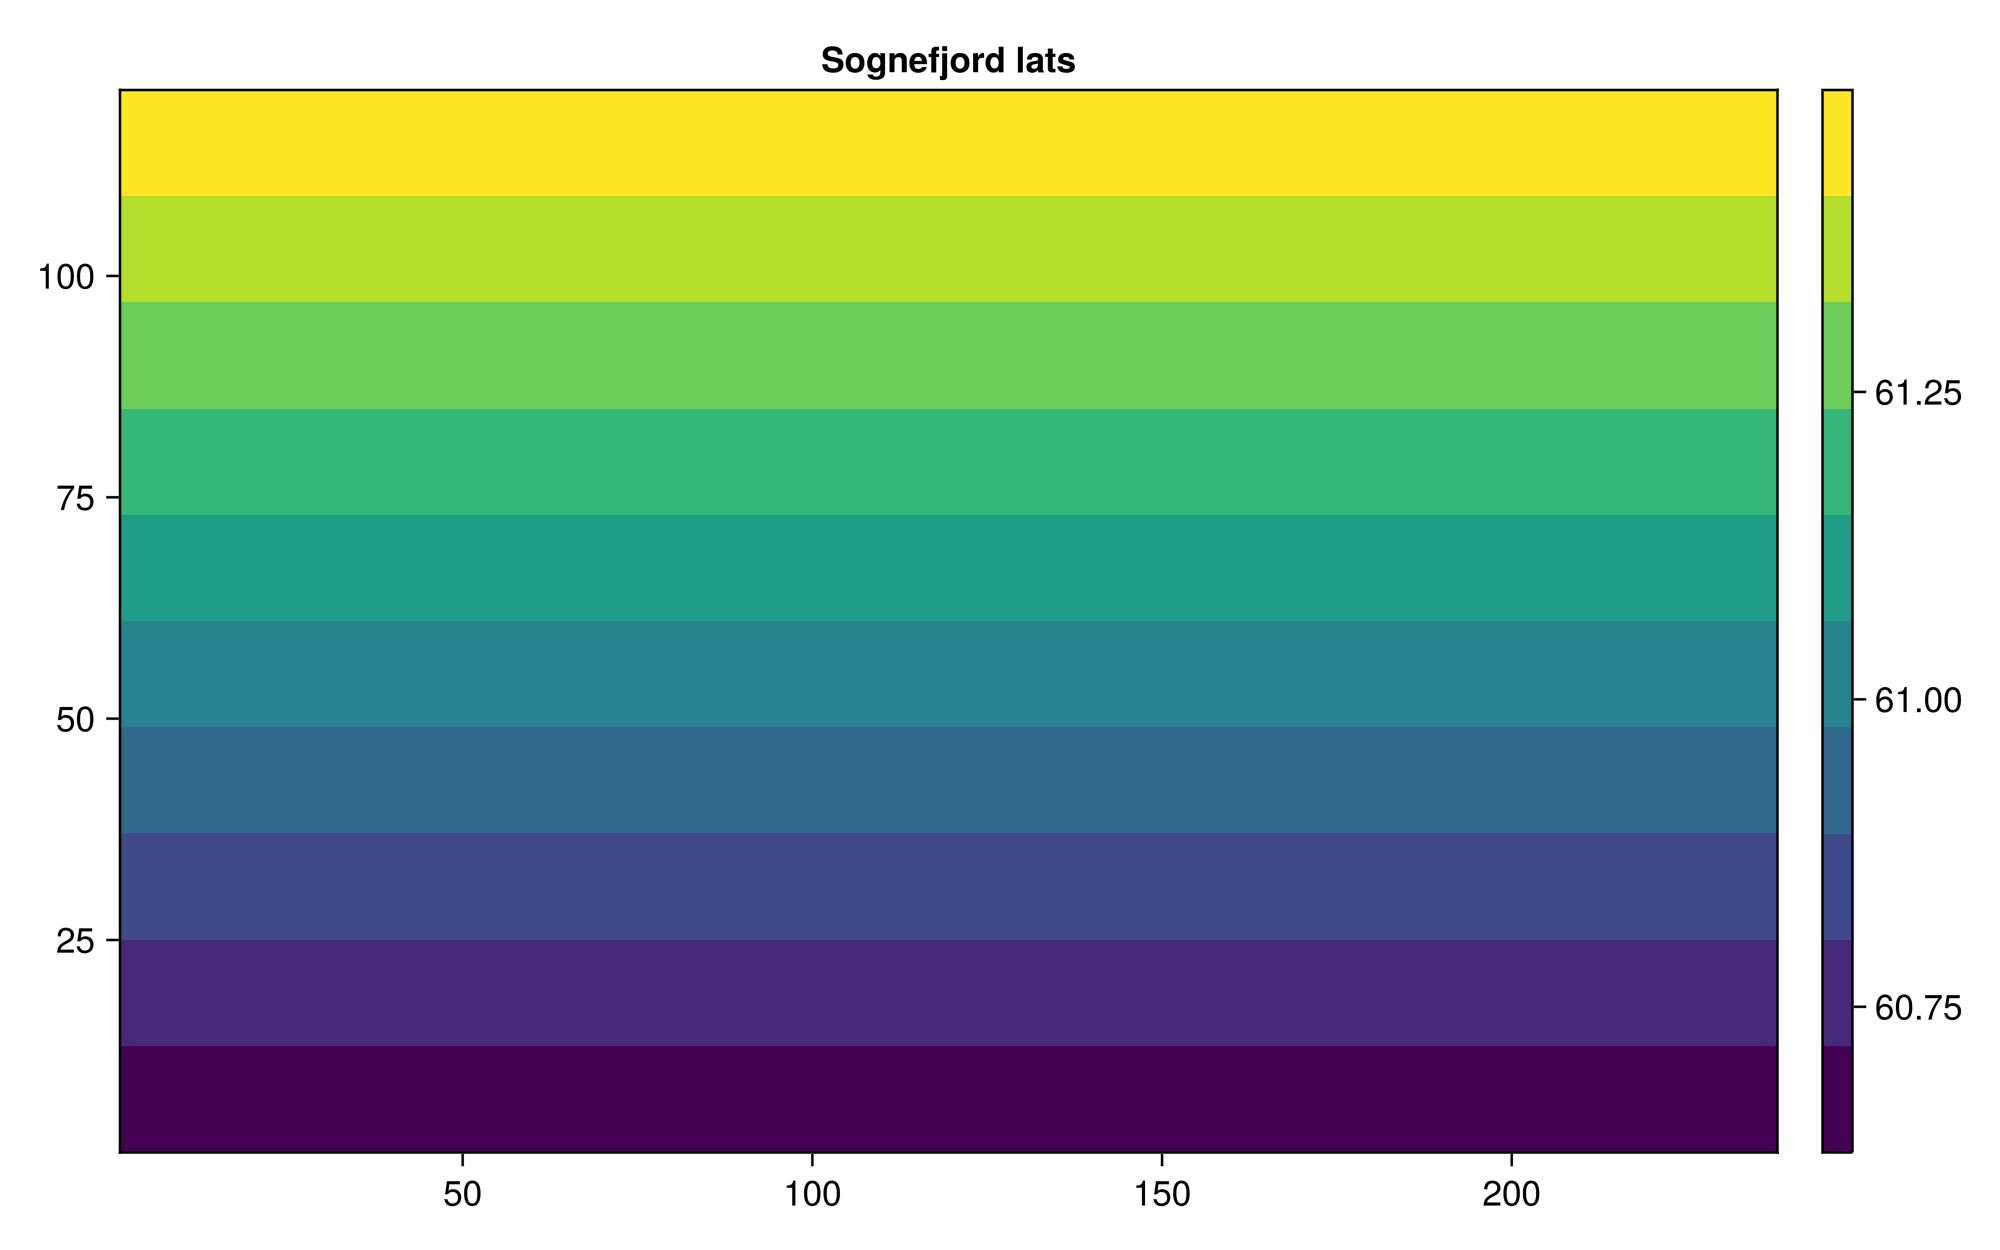

In [6]:
fig = Figure(size = (800, 500))
# Add a contour plot to the figure
ax = Axis(fig[1, 1], title = "Lattitudes")
# cf = contourf!(ax, rotr90(m, 1)[:, end:-1:1])
cf = contourf!(ax, lat_rho)
                # levels = range(-200, 0, length = 20),
                # extendhigh = :magenta)


Colorbar(fig[1, 2], cf)

# Customize the plot
ax.title = "Sognefjord lats"

# Display the figure
fig

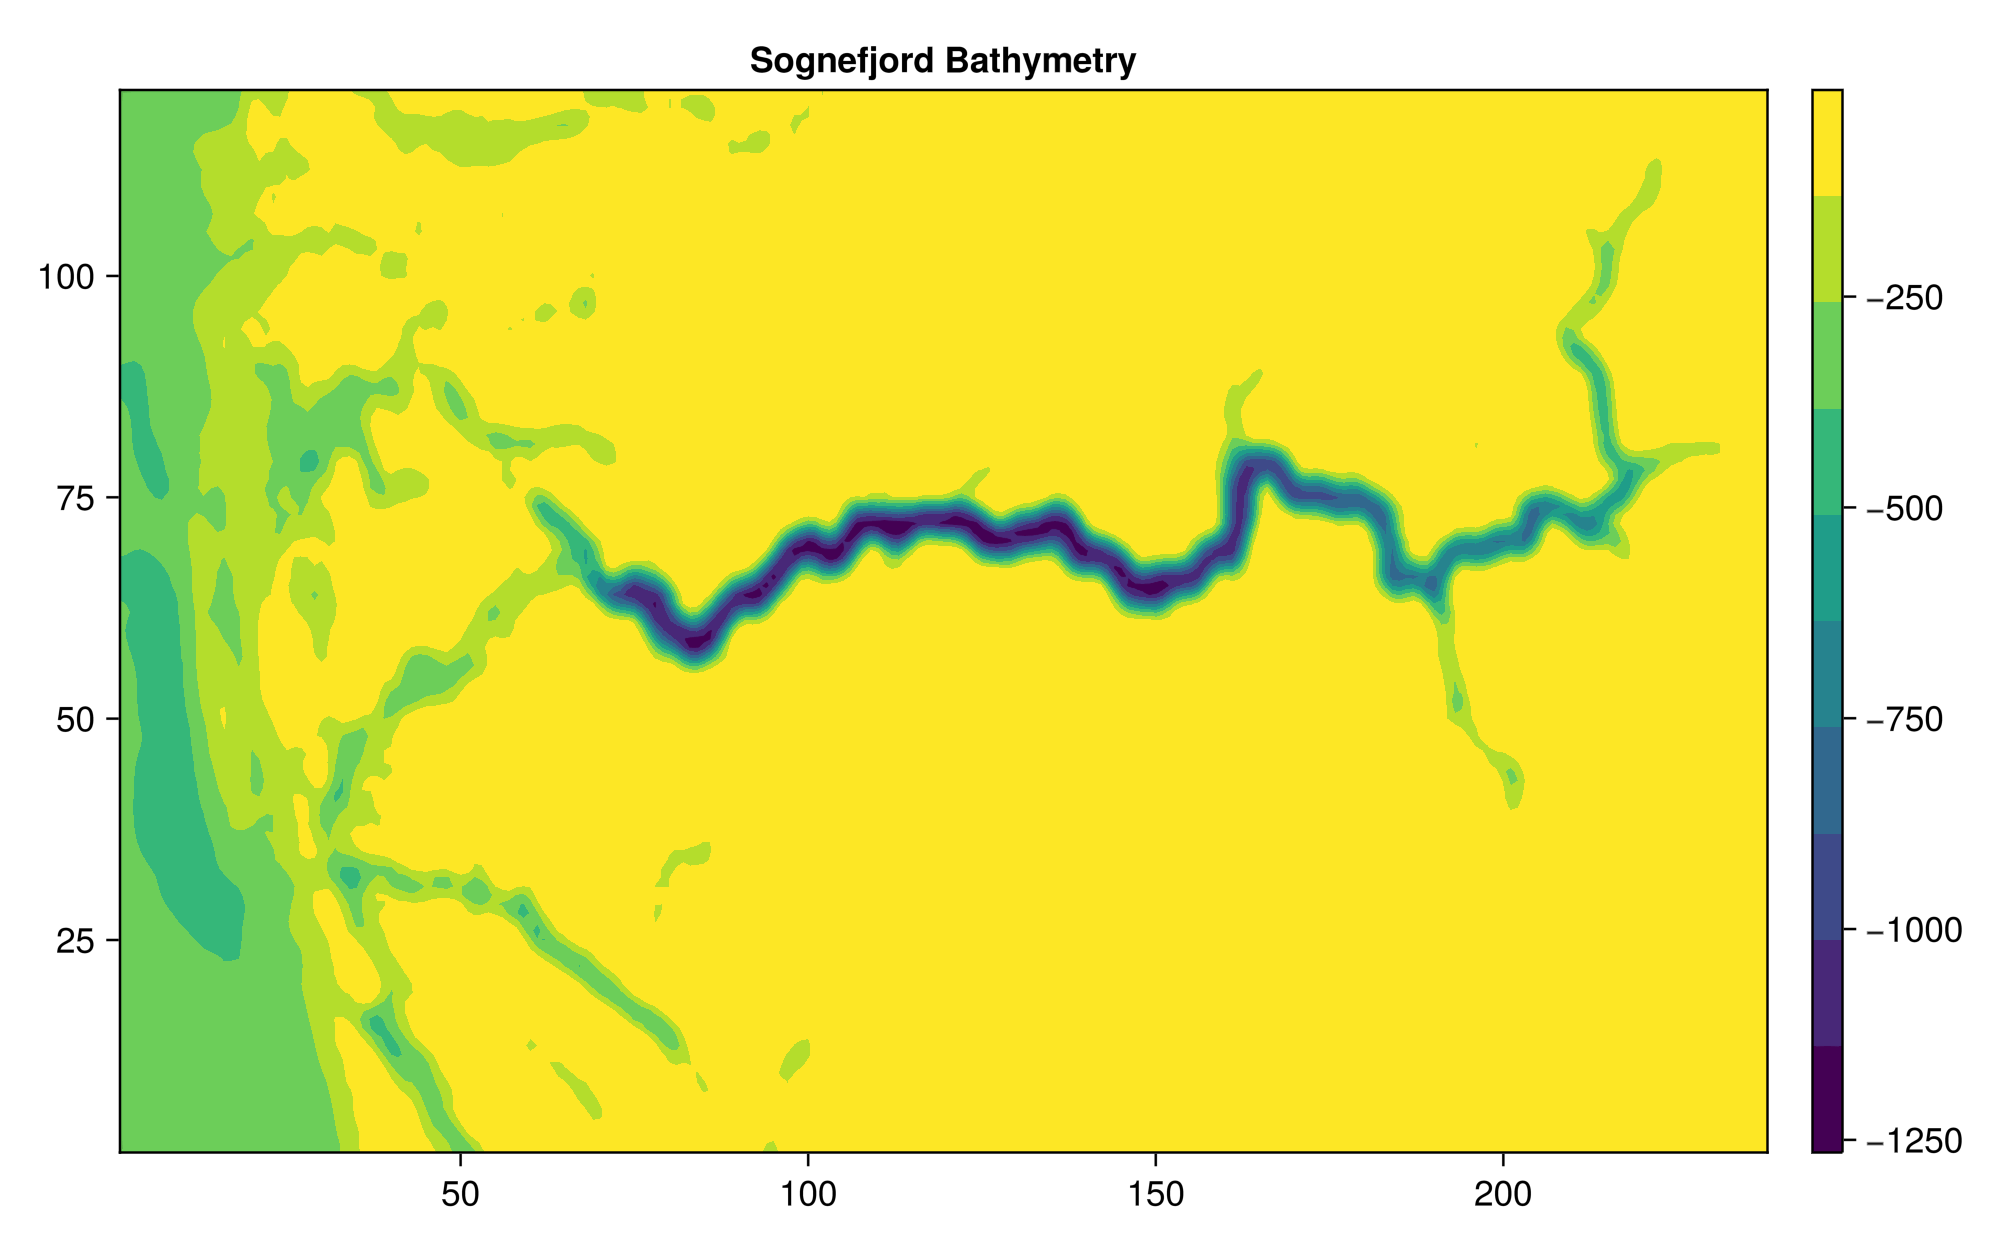

In [7]:
fig = Figure(size = (800, 500))
# Add a contour plot to the figure
ax = Axis(fig[1, 1], title = "Bathymetry")
# cf = contourf!(ax, rotr90(m, 1)[:, end:-1:1])
cf = contourf!(ax, m)
                # levels = range(-200, 0, length = 20),
                # extendhigh = :magenta)


Colorbar(fig[1, 2], cf)

# Customize the plot
ax.title = "Sognefjord Bathymetry"

# Display the figure
fig

In [8]:
@save "Sogn_topo.jld2" "depth" = m

In [45]:
?@save

```
@save filename var1 [var2 ...]
@save filename {compress=true} var1 name2=var2
```

Write one or more variables `var1,...` from the current scope to a JLD2 file `filename`.

For interactive use you can save all variables in the current module's global scope using `@save filename`. More permanent code should prefer the explicit form to avoid saving unwanted variables.

# Example

To save the string `hello` and array `xs` to the JLD2 file example.jld2:

```
hello = "world"
xs = [1,2,3]
@save "example.jld2" hello xs
```

For passing options to the saving command use {}

```
@save "example.jld2" {compress=true} hello xs
```

For saving variables under a different name use regular assignment syntax

```
@save "example.jld2" greeting=hello xarray = xs
```
